In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
dh3_measured = np.loadtxt('DH-3PlusCalLight-DeuteriumHalogen_HRD10391_13-38-35-263.txt', skiprows=14)

In [4]:
dh3_measured.shape

(2048, 2)

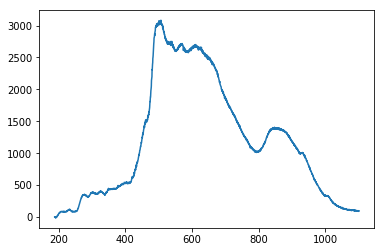

In [5]:
plt.plot(dh3_measured[:,0], dh3_measured[:,1])
plt.show()

In [6]:
dh3_interp = interp1d(dh3_measured[:,0], dh3_measured[:,1])

In [10]:
tucker = np.loadtxt('Calibrated_Source_Spectral_Output.txt', skiprows=1, delimiter=',')

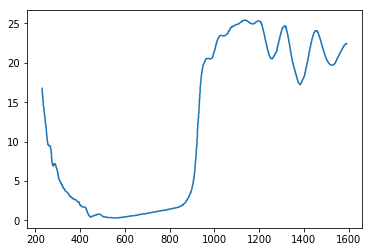

In [11]:
plt.plot(tucker[:,0], tucker[:,1])
plt.show()

In [12]:
tucker_interp = interp1d(tucker[:,0], tucker[:,1])

In [16]:
dh3_corr = tucker_interp(dh3_measured[100:,0]) / dh3_measured[100:,1]

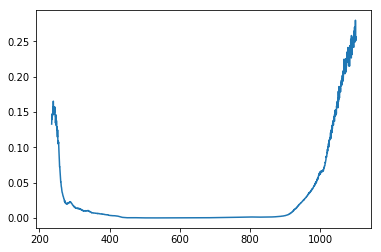

In [17]:
plt.plot(dh3_measured[100:, 0], dh3_corr)
plt.show()

In [22]:
new_cal_curve = np.dstack((dh3_measured[100:, 0], dh3_corr))[0].shape

In [23]:
np.savetxt('jana_new_cal_curve.txt', new_cal_curve)